In [1]:
import time
import datetime
import McNeuron
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Desktop/neuronData/neurons.csv")
f = time.time()
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))

10:27:06
10:28:15


In [3]:
indC = np.where(neurons['Experimental Condition']=='Control')[0]
indD = np.where(neurons['Species Name']=='drosophila melanogaster')[0]
indO = np.where(neurons['Primary Brain Region']=='optic Lobe')[0]
indP = np.where(neurons['Primary Brain Region']=='protocerebrum')[0]
swcO = [0] * 7099
swcP = [0] * 8890

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indO[:] == indD[i]) :
        swcO[counter] = neurons['swc'][indD[i]]
        counter += 1
counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indP[:] == indD[i]) :
        swcP[counter] = neurons['swc'][indD[i]]
        counter += 1

In [35]:
def getVectors(swc, size, rand) :
    n = [0] * size
    print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
    for i in range (0,size) :
        j = time.time()
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        n[i] = neuron.getNeuronVector()
        if i%100==0 :
            print(i)
        t = int(datetime.datetime.fromtimestamp(time.time()).strftime('%S')) - int(datetime.datetime.fromtimestamp(j).strftime('%S'))
        if t >= 2 | t <= -58 :
            print(t,r)
    print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
    print('done')
    return n,rand

In [5]:
#trainP,trainI,testP,testI

In [36]:
size = 3500
randO = np.linspace(0,len(swcO)-1,len(swcO))
randP = np.linspace(0,len(swcP)-1,len(swcP))
trainO,randO = getVectors(swcO, size, randO)
trainP,randP = getVectors(swcP, size, randP)
testO,randO = getVectors(swcO, size, randO)
testP,randP = getVectors(swcP, size, randP)

10:48:32
0


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: divide by zero encountered in double_scalars
  t[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:957: RuntimeWarning: divide by zero encountered in double_scalars
  e[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: invalid value encountered in double_scalars
  t[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:974: RuntimeWarning: invalid value encountered in absolute
  a[i] = max([np.abs(tiltLocal[2*i] + tiltLocal[2*i+1]),np.abs(tiltLocal[2*i] - tiltLocal[2*i+1])])
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value en

100
200


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1004: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (e/sum(e)))
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1005: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (t/sum(t)))
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1006: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (a/sum(a)))


300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
10:49:52
done
10:49:52
0
100
200
300


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:957: RuntimeWarning: invalid value encountered in double_scalars
  e[i] = np.arctan(h/b)


400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
10:51:36
done
10:51:36
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
10:53:05
done
10:53:05
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
10:55:29
done


In [39]:
def removeNaN(arr, swc, rand) :
    for i in range(0,len(arr)) :
        if(np.isnan(arr[i][50])) :
            r = randint(0,len(rand)-1)
            neuron = McNeuron.Neuron(swc[int(rand[r])])
            rand = np.delete(rand,r)
            neuron.l_measure_features()
            arr[i] = neuron.getNeuronVector()
            if(np.isnan(arr[i][50])) :
                print('sad')
            else :
                print('good')
    return rand

In [42]:
randO = removeNaN(trainO, swcO, randO)
randP = removeNaN(trainP, swcP, randP)
randO = removeNaN(testO, swcO, randO)
randP = removeNaN(testP, swcP, randP)

In [224]:
trainO = np.vstack(trainO)
trainP = np.vstack(trainP)
testO = np.vstack(testO)
testP = np.vstack(testP)

train = np.concatenate((trainO,trainP))
test = np.concatenate((testO,testP))
y = np.concatenate(([0] * size,[1] * size))

In [278]:
def subsetData(arr):
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][:22]
    return x

In [287]:
a = subsetData(trainO)
b = subsetData(trainP)
c = subsetData(testO)
d = subsetData(testP)

a = np.vstack(a)
b = np.vstack(b)
c = np.vstack(c)
d = np.vstack(d)

train = np.concatenate((a,b))
test = np.concatenate((c,d))
y = np.concatenate(([0] * size,[1] * size))

In [273]:
for q in range(0,22) :
    a = subsetData(trainO,q)
    b = subsetData(trainP,q)
    c = subsetData(testO,q)
    d = subsetData(testP,q)
    
    train = np.expand_dims(np.concatenate((a,b)),axis=1)
    test = np.expand_dims(np.concatenate((c,d)),axis=1)
    
    y = np.concatenate(([0] * size,[1] * size))
    clf = BaggingClassifier(RandomForestClassifier())
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 2
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy , q)

0.575 0
0.5665714285714286 1
0.6051428571428571 2
0.5 3
0.49985714285714283 4
0.5 5
0.5735714285714286 6
0.5695714285714286 7
0.5701428571428572 8
0.5418571428571428 9
0.5374285714285715 10
0.5492857142857143 11
0.593 12
0.6078571428571429 13
0.6484285714285715 14
0.6032857142857143 15
0.5548571428571428 16
0.6572857142857143 17
0.546 18
0.5407142857142857 19
0.6555714285714286 20
0.6611428571428571 21


In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [222]:
#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(RandomForestClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [242]:
clf.fit(train,y)
z = clf.predict(test)

sum = 0
parts = 2
for i in range (0,parts) :
    for j in range (0,size) :
        if z[j + size*i] == i :
            sum += 1
accuracy = sum / len(z)
print(sum)
print(accuracy)

5659
0.8084285714285714


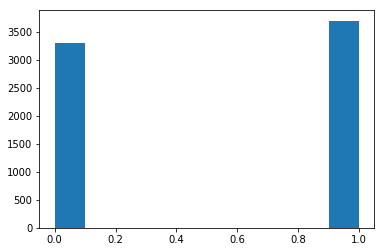

3301
3699


In [243]:
plt.hist(z)
plt.show()
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))

In [234]:
p1 = McNeuron.Neuron(swcO[12])
p1.l_measure_features()
p2 = McNeuron.Neuron(swcP[12])
p2.l_measure_features()
clf.predict([p1.getNeuronVector()[:22],p2.getNeuronVector()[:22]])

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: divide by zero encountered in double_scalars
  t[i] = np.arctan(h/b)


array([0, 1])

In [236]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.006s...
[t-SNE] Computed neighbors for 7000 samples in 0.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 22.874686
[t-SNE] Computed conditional probabilities in 0.313s
[t-SNE] Iteration 50: error = 87.5167084, gradient norm = 0.0418201 (50 iterations in 11.219s)
[t-SNE] Iteration 100: error = 71.3541565, gradient norm = 0.0083449 (50 iterations in 7.536s)
[t-SNE] Iteration 150: error = 68.0832367, gradient norm = 0.0065861 (50 iterations in 7.784s)
[t-SNE] Iteration 200: error 

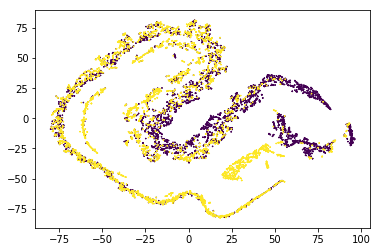

In [247]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y, s=0.5, marker='x')
plt.show()

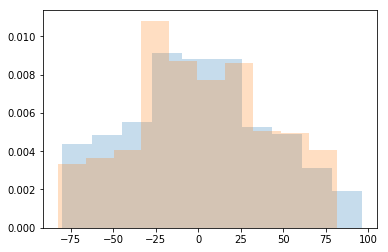

In [303]:
plt.hist(X_embedded[:,0], normed=True, alpha = 0.25)
plt.hist(X_embedded[:,1], normed=True, alpha = 0.25)
plt.show()

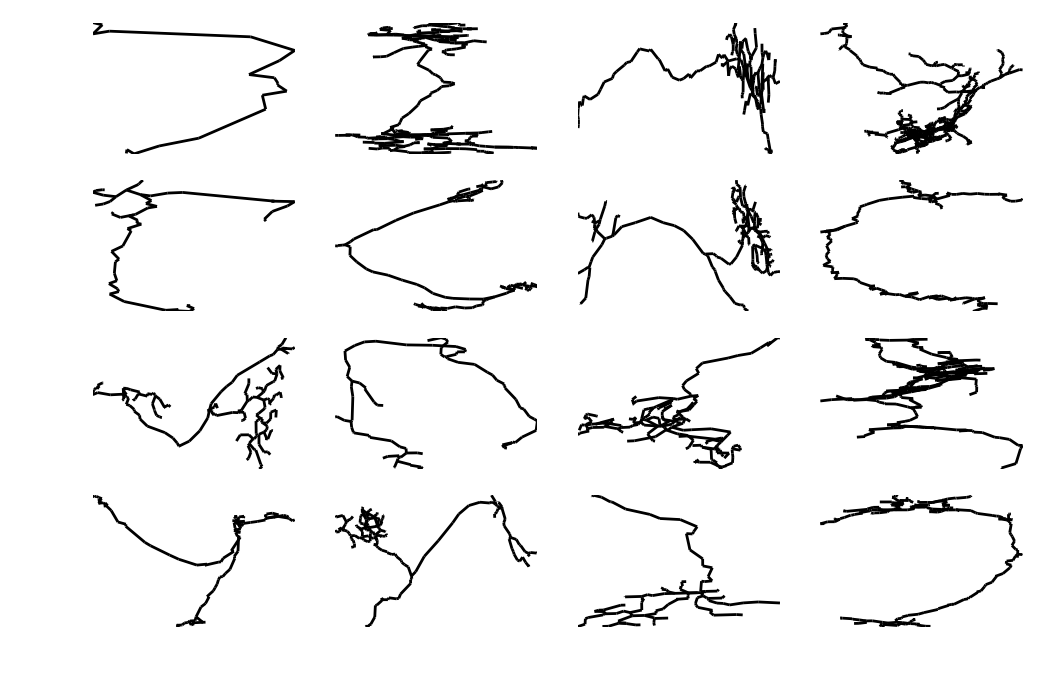

In [304]:
f,g = 4,4
fig, axis = plt.subplots(f,g)
fig.dpi = 200
for i in range (0,f) :
    for j in range (0,g) :
        if j%2==0 :
            McNeuron.visualize.plot_2D(McNeuron.Neuron(swcO[randint(0,len(swcO)-1)]), pass_ax=True, ax=axis[i,j], show_soma=True)
        else :
            McNeuron.visualize.plot_2D(McNeuron.Neuron(swcP[randint(0,len(swcP)-1)]), pass_ax=True, ax=axis[i,j], show_soma=True)
plt.show()